<a href="https://colab.research.google.com/github/KaifArman/data-project/blob/main/Data_Analysis_Internship_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 1: Top Cuisines**



In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [24]:
df = pd.read_csv('Dataset .csv')

# Inspecting the data

In [25]:
print(df.head())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [26]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

# Cleaning the Cuisines column

In [27]:
df['Cuisines'] = df['Cuisines'].str.strip()

# Top three most common cuisines

In [28]:
top_cuisines = df['Cuisines'].value_counts().head(3)
print("Top 3 Cuisines:\n", top_cuisines)

Top 3 Cuisines:
 Cuisines
North Indian             936
North Indian, Chinese    511
Chinese                  354
Name: count, dtype: int64


# Calculating the percentage of restaurants serving each of the top cuisines

In [29]:
total_restaurants = len(df)
top_cuisines_percentage = (top_cuisines / total_restaurants) * 100
print("\nPercentage of restaurants serving each of the top cuisines:\n", top_cuisines_percentage)


Percentage of restaurants serving each of the top cuisines:
 Cuisines
North Indian             9.800021
North Indian, Chinese    5.350225
Chinese                  3.706418
Name: count, dtype: float64


# Visualizing the top cuisines


<ipython-input-30-14697e5577da>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cuisines.index, y=top_cuisines.values, palette='viridis')


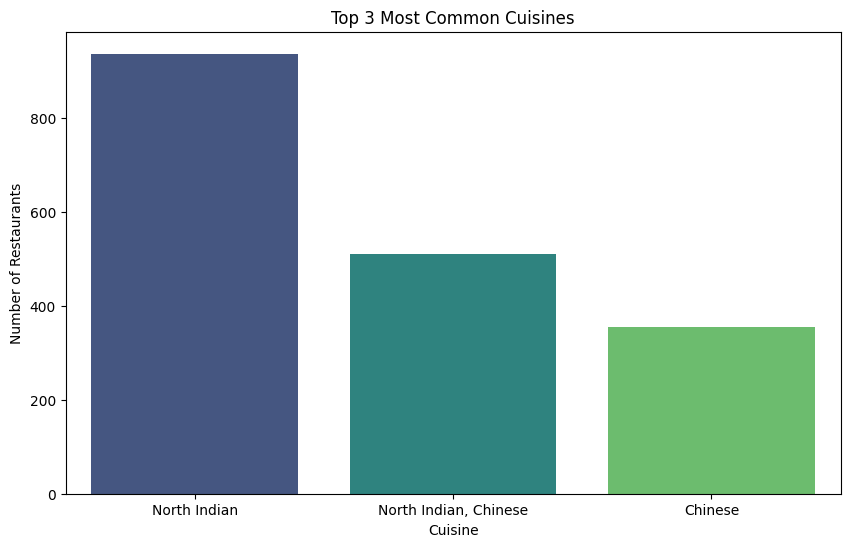

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_cuisines.index, y=top_cuisines.values, palette='viridis')
plt.title('Top 3 Most Common Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Number of Restaurants')
plt.show()

# **Task 2: City Analysis**

# City with the highest number of restaurants

In [31]:
city_counts = df['City'].value_counts()
highest_city = city_counts.idxmax()
highest_count = city_counts.max()
print(f"The city with the highest number of restaurants is {highest_city} with {highest_count} restaurants.")

The city with the highest number of restaurants is New Delhi with 5473 restaurants.


# Calculating the average rating for restaurants in each city

In [32]:
average_ratings = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)
print("\nAverage Ratings by City:\n", average_ratings)


Average Ratings by City:
 City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
                      ...   
New Delhi           2.438845
Montville           2.400000
Mc Millan           2.400000
Noida               2.036204
Faridabad           1.866932
Name: Aggregate rating, Length: 141, dtype: float64


# Determining the city with the highest average rating



In [33]:
highest_avg_rating_city = average_ratings.idxmax()
highest_avg_rating = average_ratings.max()
print(f"The city with the highest average rating is {highest_avg_rating_city} with an average rating of {highest_avg_rating:.2f}.")

The city with the highest average rating is Inner City with an average rating of 4.90.


# **Task 3: Price Range Distribution**

<ipython-input-34-403dbcace765>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Price range', palette='viridis')


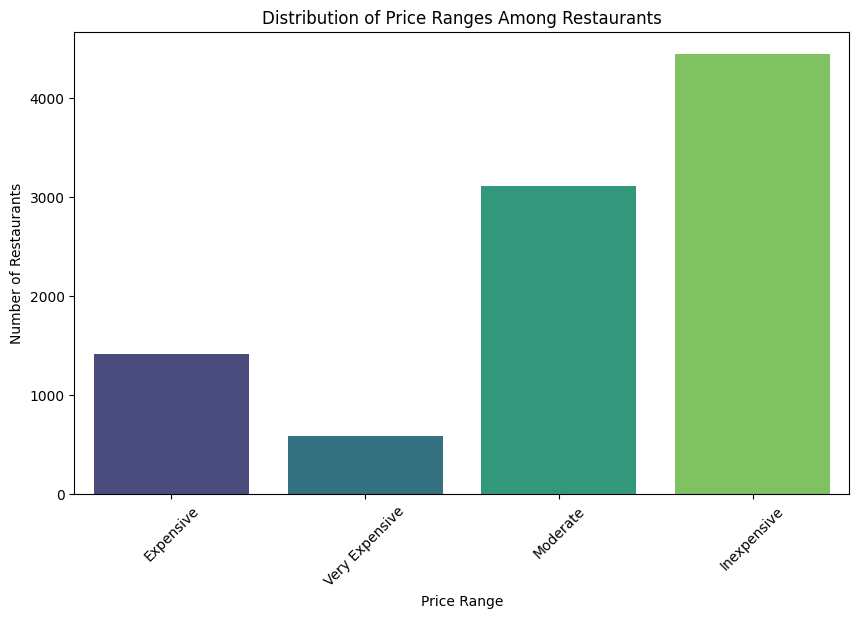

In [34]:
price_labels = {1: 'Inexpensive', 2: 'Moderate', 3: 'Expensive', 4: 'Very Expensive'}
df['Price range'] = df['Price range'].map(price_labels)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Price range', palette='viridis')
plt.title('Distribution of Price Ranges Among Restaurants')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()

# Calculating the percentage of restaurants in each price range

In [35]:
price_range_counts = df['Price range'].value_counts(normalize=True) * 100
print("\nPercentage of Restaurants in Each Price Range:\n", price_range_counts)


Percentage of Restaurants in Each Price Range:
 Price range
Inexpensive       46.529159
Moderate          32.593446
Expensive         14.741912
Very Expensive     6.135483
Name: proportion, dtype: float64
